# Actividad 1

In [17]:
# import required libraries
import matplotlib.pyplot as pyplot
import pandas
import math
import numpy

from collections import Counter
from PIL import Image

In [9]:
# define functions
def load_text_file(path):
    with open(path, 'r', encoding='utf-8') as archive:
        return archive.read()


def count_unique_characters_from_text(text):
    unique_characters = set(text)
    return len(unique_characters)


def calculate_frequencies_from_text(text):
    return Counter(text)


def calculate_entropy_from_text(text):
    frequencies = Counter(text)
    total_characters = sum(frequencies.values())

    return -sum((freq / total_characters) * math.log2(freq / total_characters) for char, freq in frequencies.items())


def plot_histogram_from_text(frequencies):
    df = pandas.DataFrame(list(frequencies.items()), columns=['character', 'Frequency']).sort_values(by='Frequency',
                                                                                                     ascending=False)
    pyplot.figure(figsize=(10, 8))
    pyplot.bar(df['character'], df['Frequency'], color='gray')
    pyplot.xlabel('character')
    pyplot.ylabel('frequency')
    pyplot.title('Histogram')
    pyplot.xticks(rotation=90)

    pyplot.show()



Unique characters of text file: 71
Entropy of text file: 4.428623661418399


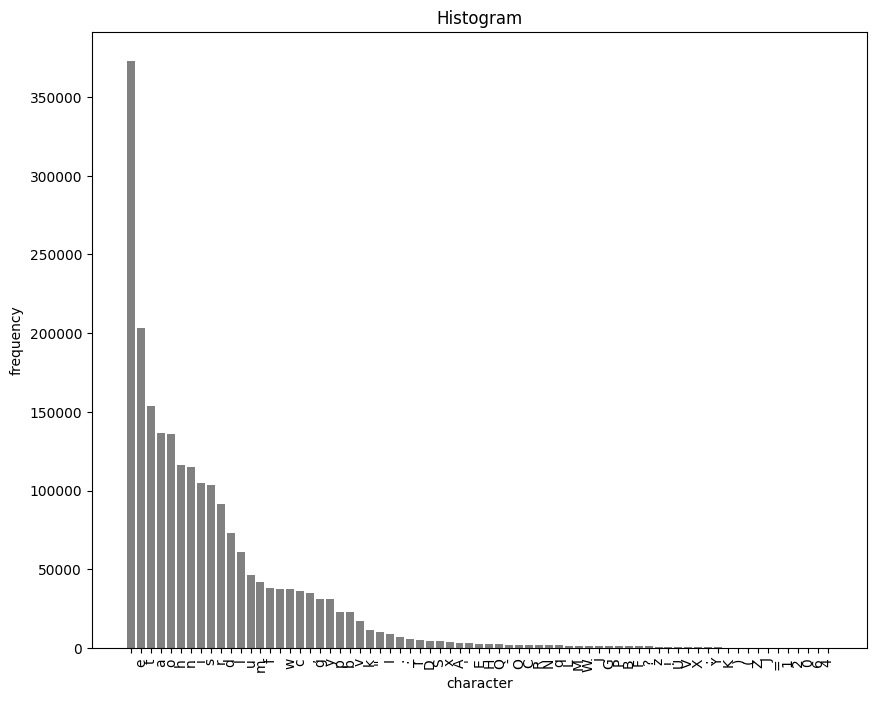

In [10]:
# don-quixote.txt

path = 'data/don-quixote.txt'
text = load_text_file(path)

number = count_unique_characters_from_text(text)
print("Unique characters of text file:", number)

entropy = calculate_entropy_from_text(text)
print("Entropy of text file:", entropy)

frequencies = calculate_frequencies_from_text(text)
plot_histogram_from_text(frequencies)

Unique characters of text file: 26
Entropy of text file: 2.154465588925389


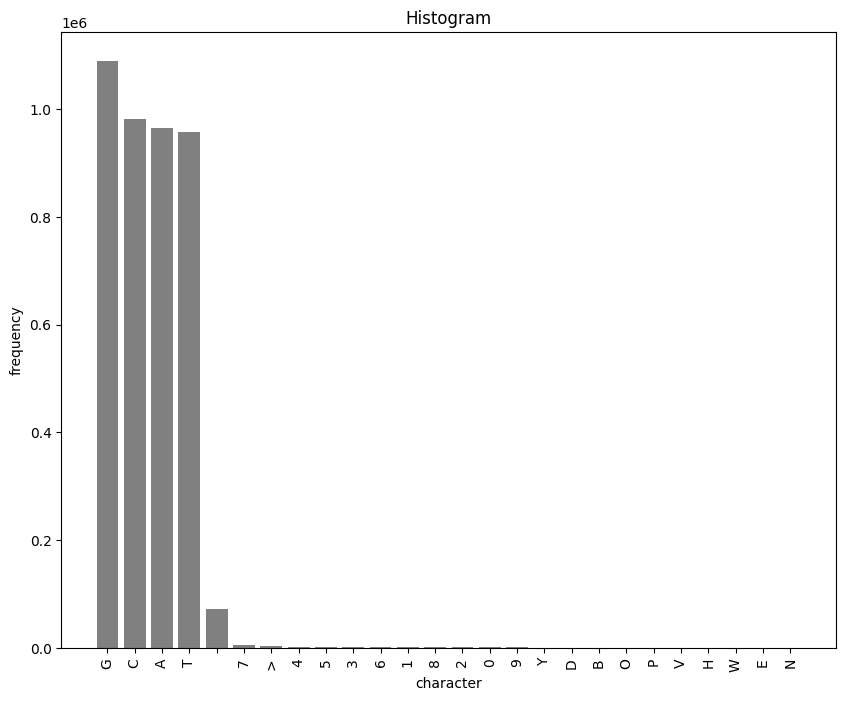

In [11]:
# ecoli.fa

path = 'data/ecoli.fa'
text = load_text_file(path)

number = count_unique_characters_from_text(text)
print("Unique characters of text file:", number)

entropy = calculate_entropy_from_text(text)
print("Entropy of text file:", entropy)

frequencies = calculate_frequencies_from_text(text)
plot_histogram_from_text(frequencies)

In [20]:
# define functions

def load_image_file(path):
    return Image.open(path)


def count_unique_colors_from_image(image):
    unique_colors = set(image.getdata())
    return len(unique_colors)


def calculate_entropy_from_image(image):
    histogram = image.histogram()
    total_pixels = sum(histogram)

    return -sum((h / total_pixels) * math.log2(h / total_pixels) for h in histogram if h != 0)


def plot_histogram_from_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')

    data = image.getdata()

    colors = {}
    for color in data:
        if color in colors:
            colors[color] += 1
        else:
            colors[color] = 1

    colors_sorted = sorted(colors.items(), key=lambda x: x[1], reverse=True)
    colors, frequencies = zip(*colors_sorted)

    pyplot.figure(figsize=(10, 8))
    pyplot.bar(range(len(colors)), frequencies, color=[f'#{r:02x}{g:02x}{b:02x}' for r, g, b in colors])
    pyplot.xlabel('pixel')
    pyplot.ylabel('frequency')
    pyplot.title('Histogram')

    pyplot.show()




Unique colors of image file: 140
Entropy of image file: 3.9662984761847087


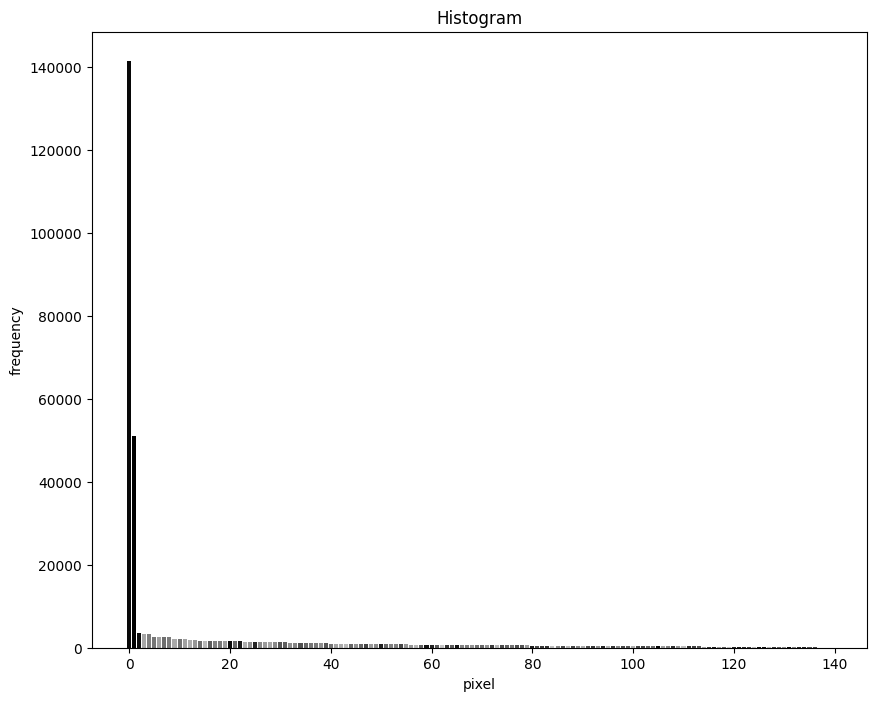

In [21]:
# saturn.ascii.png

path = 'data/saturn.ascii.png'

image = load_image_file(path)

number = count_unique_colors_from_image(image)
print("Unique colors of image file:", number)

entropy = calculate_entropy_from_image(image)
print("Entropy of image file:", entropy)

plot_histogram_from_image(image)

Unique colors of image file: 226
Entropy of image file: 7.358190551892003


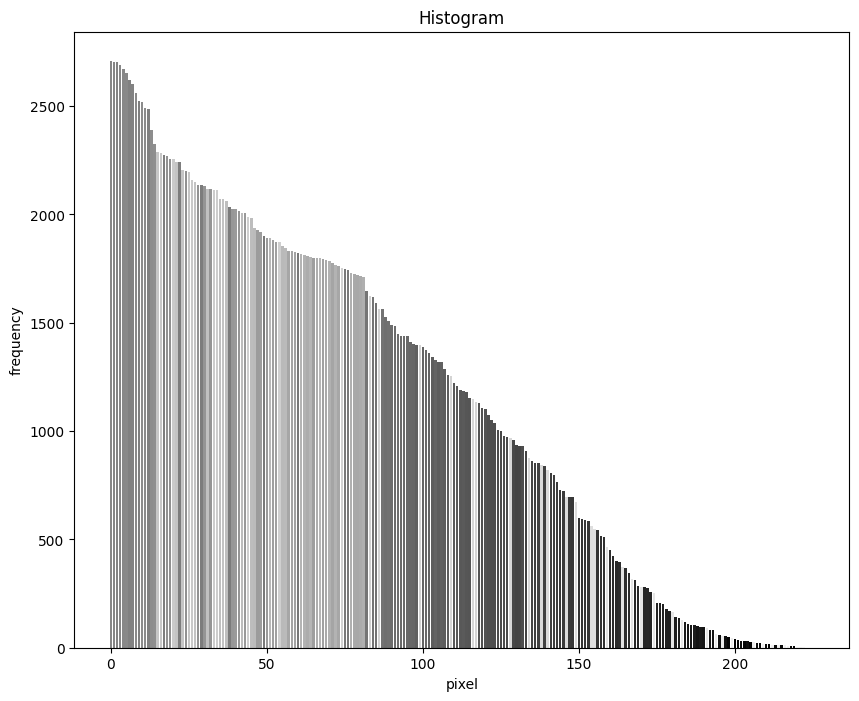

In [22]:
# baboon.ascii.png

path = 'data/baboon.ascii.png'

image = load_image_file(path)

number = count_unique_colors_from_image(image)
print("Unique colors of image file:", number)

entropy = calculate_entropy_from_image(image)
print("Entropy of image file:", entropy)

plot_histogram_from_image(image)